
**Problem statement : Implement Logistic Regression with
Gradient Descent on heart disease dataset**

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

**Q.1 Mention additional information about the dataset and properties of the attribute.**

**Cordivacular diseases, in colloquial speech heart diseases can be big trouble for human kind. In this kernel we are going to try to make analysis about this illness by investigating different parameters.**

In [6]:
dataset = pd.read_csv('/content/gdrive/MyDrive/AI-ML/Final AI/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Number of column and row in dataset**

In [7]:
print("Number of column and rows of datadet : ",dataset.shape)
print("Number of column in dataframe  : ",dataset.dtypes.count())


Number of column and rows of datadet :  (1025, 14)
Number of column in dataframe  :  14


**Data type of attribute**

In [8]:
print("\n--------------------------------\nColumn  \t Datatype \n")
dataset.dtypes


--------------------------------
Column  	 Datatype 



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Number of NUll value exiting in dataset**

In [9]:
print("Column     Null Values\n")
print(dataset.isnull().sum())

Column     Null Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**showing top 5 and last 5 data row of dataset**

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Q.2 Statistical summary or descriptive statistics of data set**

**average age of  all patient in dataset**

In [11]:
meanage = round(dataset["age"].mean(),1)

print("Mean age of patient :  ",meanage)

Mean age of patient :   54.4


**Average age of patient by gender**

In [12]:
data = dataset.groupby("sex")["age"].mean()
print("Average age of patient : \n",data)

Average age of patient : 
 sex
0    55.849359
1    53.814867
Name: age, dtype: float64


**maximum age of patient by gender**

In [13]:
data = dataset.groupby("sex")["age"].max()
print("Maixman age of patienet : \n",data)

Maixman age of patienet : 
 sex
0    76
1    77
Name: age, dtype: int64


**minmum age of patient by gender**

In [14]:
data = dataset.groupby("sex")["age"].min()
print("Minimum age of patienet : \n",data)

Minimum age of patienet : 
 sex
0    34
1    29
Name: age, dtype: int64


**Mean value of patient age**

In [15]:
data = dataset["age"].mode()
print("Mode of age of patient : ",data)

Mode of age of patient :  0    58
dtype: int64


**Number patient having disease**

In [16]:
data=dataset["target"].count()
print(data)

1025


**This is corrolation table. By the helping of this table we can see that if features have corrolation or not (if values is close to 1 there is positive corrolation, if near to -1 negative corrolation, and if it near to 0 there are no corrolation).**

In [17]:
# Import seaborn 
import seaborn as sb

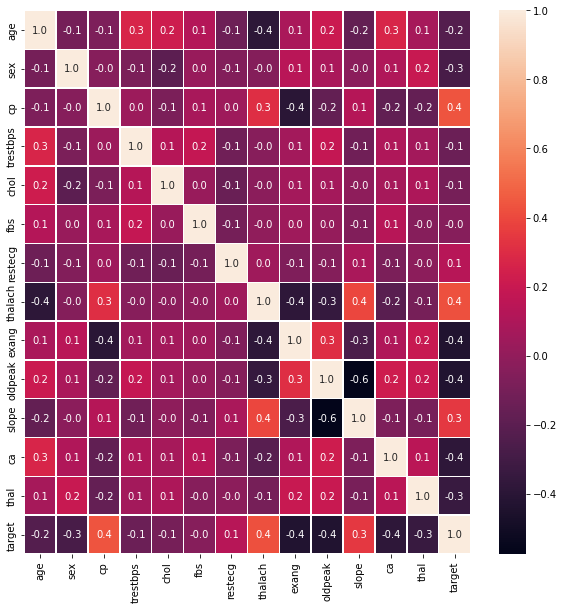

In [18]:
f,ax = plt.subplots(figsize=(10, 10))
sb.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Data Exploration and Visualisation for understandingdata**

In [19]:
dataset.sex.value_counts()
fig = px.pie(dataset, names='sex',title='Plot gneder count ', color_discrete_sequence=["orange", "yellow", "purple"])
fig.show()

[Text(0.5, 0, 'parameter'), Text(0.5, 1.0, 'Max value in dataset')]

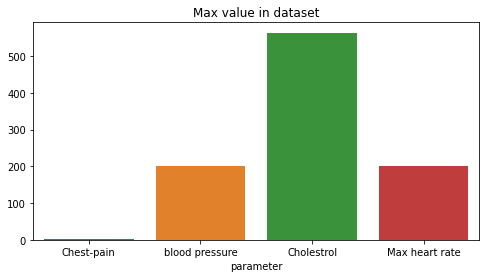

In [20]:
maxcp = round(dataset["cp"].max(),1)
maxbp = dataset["trestbps"].max()
maxchol = round(dataset["chol"].max(),1)
maxth = round(dataset["thalach"].max(),1)

x = ['Chest-pain','blood pressure','Cholestrol','Max heart rate']
y = [maxcp,maxbp,maxchol,maxth]
plt.rcParams['figure.figsize'] = [8, 4]
sb.barplot(x, y).set(title="Max value in dataset",xlabel='parameter')

[Text(0.5, 0, 'parameter'), Text(0.5, 1.0, 'Min value on dataset')]

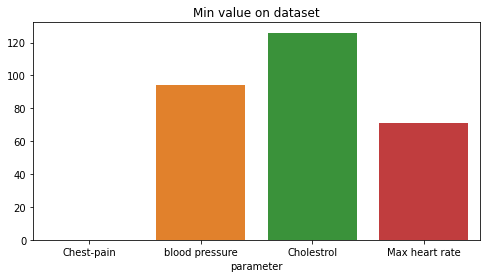

In [21]:
mincp = round(dataset["cp"].min(),1)
minbp = dataset["trestbps"].min()
minchol = round(dataset["chol"].min(),1)
minth = round(dataset["thalach"].min(),1)

x = ['Chest-pain','blood pressure','Cholestrol','Max heart rate']
y = [mincp,minbp,minchol,minth]
plt.rcParams['figure.figsize'] = [8,4]
sb.barplot(x, y).set(title="Min value on dataset",xlabel='parameter')

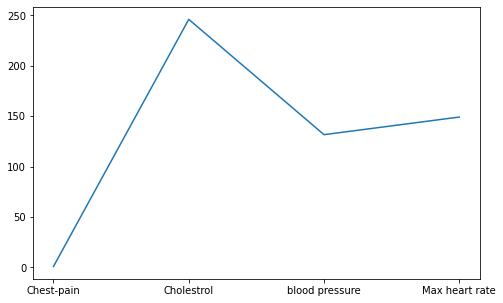

In [22]:
meancp = round(dataset["cp"].mean(),1)
meanbp = dataset["trestbps"].mean()
meanchol = round(dataset["chol"].mean(),1)
meanth = round(dataset["thalach"].mean(),1)

a = [meancp ,meanchol , meanbp ,  meanth]
x = ['Chest-pain','Cholestrol','blood pressure','Max heart rate']
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(x, a)

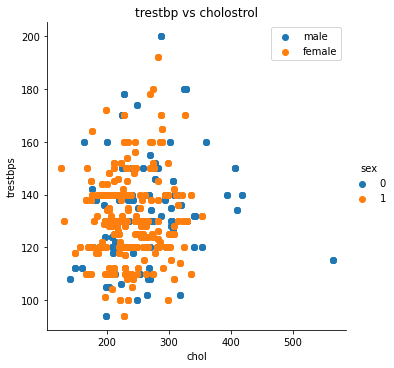

In [23]:

1# We'll use seaborn's FacetGrid to color the scatterplot by species
sb.FacetGrid(dataset, hue="sex", height=5).map(plt.scatter, "chol", "trestbps").add_legend()
plt.title("trestbp vs cholostrol")
plt.legend(["male", "female"])
plt.show()

count of men and women having disease or not

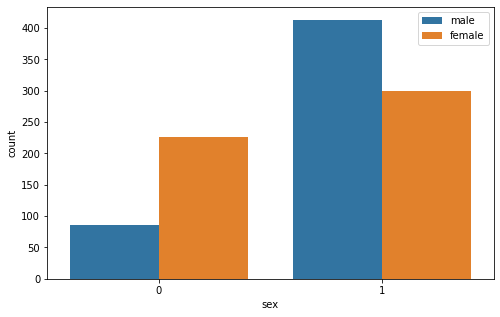

In [24]:
sb.countplot(x=dataset['sex'],hue=dataset['target'])
plt.legend(["male", "female"])
plt.show()

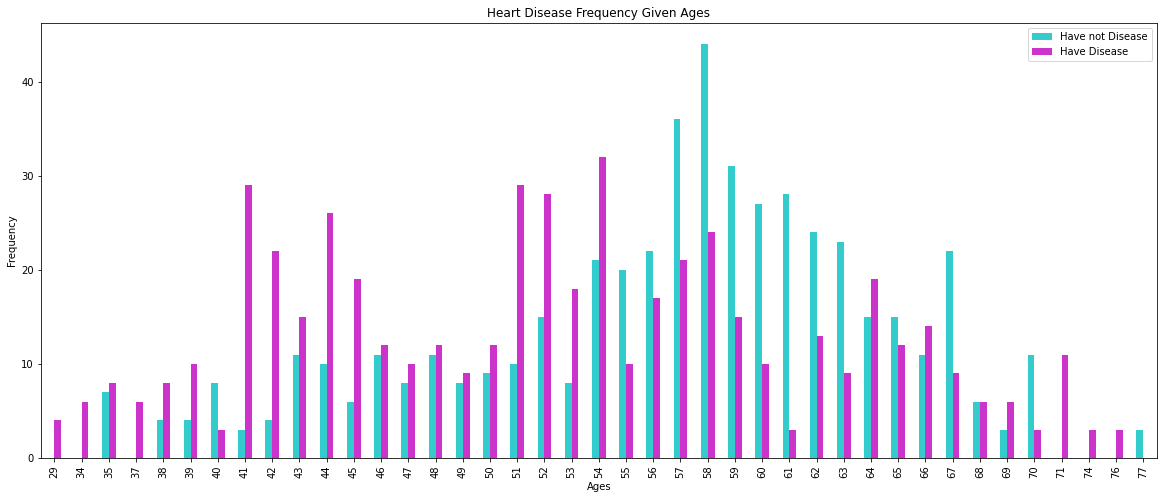

In [25]:
crosstabAge = pd.crosstab(dataset.age,dataset.target)
crosstabAge.plot(kind="bar",figsize=(20,8), color ="cmyk", alpha = 0.8) #alpha is opacity
plt.title('Heart Disease Frequency Given Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.legend(["Have not Disease", "Have Disease"])
plt.show()

Having deisease or not

Text(0.5, 0, ' 0 = Not Have Disease,  1 = Have Disease')

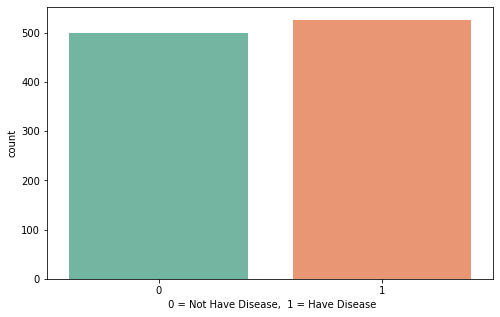

In [26]:
sb.countplot(dataset["target"], palette="Set2")
plt.xlabel(' 0 = Not Have Disease,  1 = Have Disease')

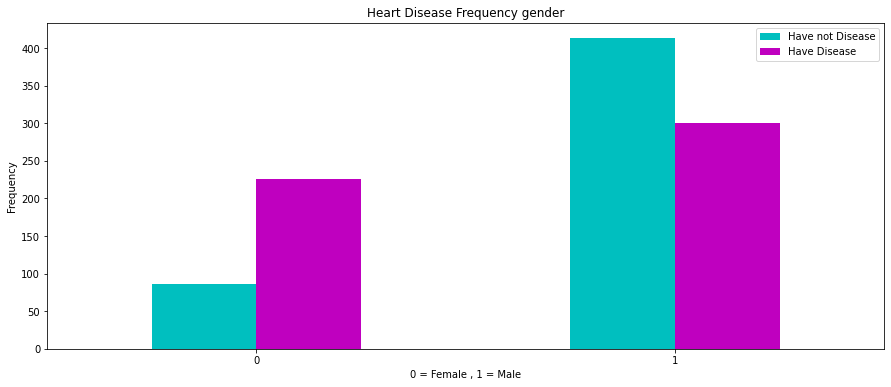

In [27]:
crosstabSex = pd.crosstab(dataset["sex"], dataset["target"])

crosstabSex.plot(kind="bar", figsize=(15,6), color="cmyk")
plt.title("Heart Disease Frequency gender")
plt.xticks(rotation=0)
plt.xlabel("0 = Female , 1 = Male")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

number men having disease or not also for women is ploted using bar chart

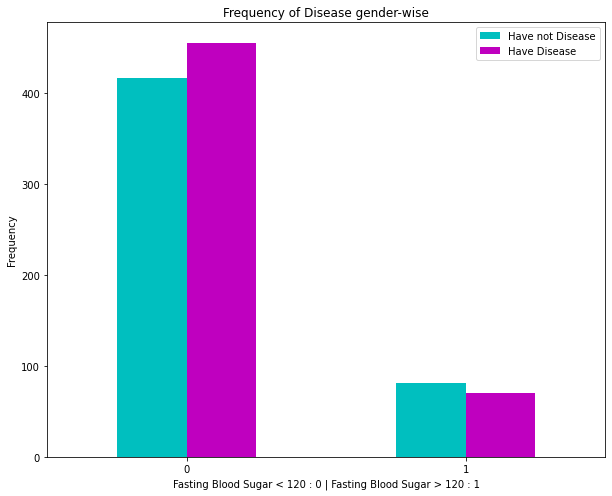

In [28]:
crosstabFbs = pd.crosstab(dataset["fbs"], dataset["target"])

crosstabFbs.plot(kind="bar", figsize=(10, 8), color="cmyk")
plt.xticks(rotation=0)
plt.xlabel("Fasting Blood Sugar < 120 : 0 | Fasting Blood Sugar > 120 : 1")
plt.ylabel("Frequency")
plt.title("Frequency of Disease gender-wise")
plt.legend(["Have not Disease", "Have Disease"])

**Data Preparation or preprocessing using Python: Data wrangling and cleaning for converting raw to ready to use data.**

**First data prepration tech. is to remove or replace Nan value will mean values.**

In [29]:
print("Column     Null Values\n")
print(dataset.isnull().sum())

Column     Null Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Removing the duplicates values**

In [30]:
dataset.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


**Replacing the nan value with mean value**

**Implement Machine Learning Algorithm**

**First of all, we need to make normalization on data because in this data there are some values trestbs, chol and there are binary values like 0 and 1. This may cause overtower between datas on features. To prevent this, we are doing normalization**

In [31]:
y = dataset.target.values #values convert values onto numpy array
x_data = dataset.drop(["target"], axis=1) #except for target the other columns is our x data

In [32]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
print(x)

           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0     0.479167  1.0  0.000000  0.292453  0.196347  0.0      0.5  0.740458   
1     0.500000  1.0  0.000000  0.433962  0.175799  1.0      0.0  0.641221   
2     0.854167  1.0  0.000000  0.481132  0.109589  0.0      0.5  0.412214   
3     0.666667  1.0  0.000000  0.509434  0.175799  0.0      0.5  0.687023   
4     0.687500  0.0  0.000000  0.415094  0.383562  1.0      0.5  0.267176   
...        ...  ...       ...       ...       ...  ...      ...       ...   
1020  0.625000  1.0  0.333333  0.433962  0.216895  0.0      0.5  0.709924   
1021  0.645833  1.0  0.000000  0.292453  0.301370  0.0      0.0  0.534351   
1022  0.375000  1.0  0.000000  0.150943  0.340183  0.0      0.0  0.358779   
1023  0.437500  0.0  0.000000  0.150943  0.292237  0.0      0.0  0.671756   
1024  0.520833  1.0  0.000000  0.245283  0.141553  0.0      0.5  0.320611   

      exang   oldpeak  slope    ca      thal  
0       0.0  0.161290    1.0

**Alright its time to split to train and test**

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)

In [34]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

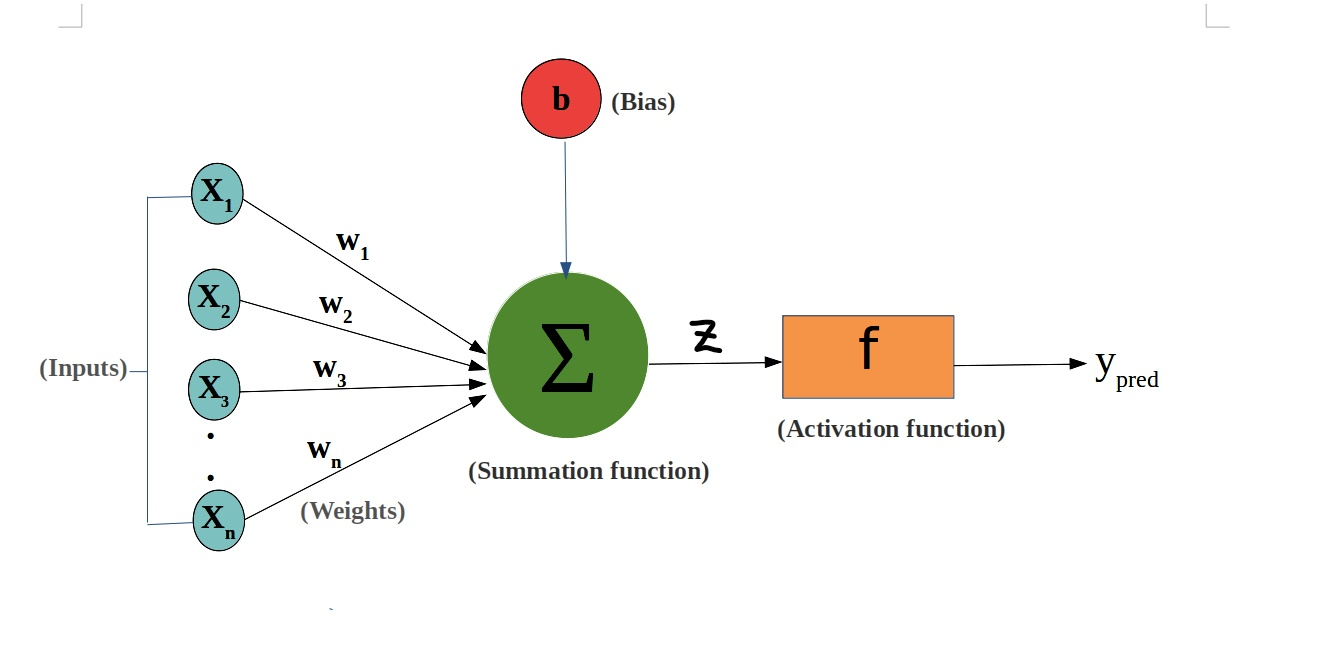

Weights are coefficent

Bias is interception

Activation functions are mathematical functions like unit step function, sigmoid etc. 

We will use sigmoid
Basicaly its working based on very familiar expression y = wx + b

In [35]:
def initialize_weights_and_bias(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight,bias

In [36]:
np.full((10, 1), 0.01)

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

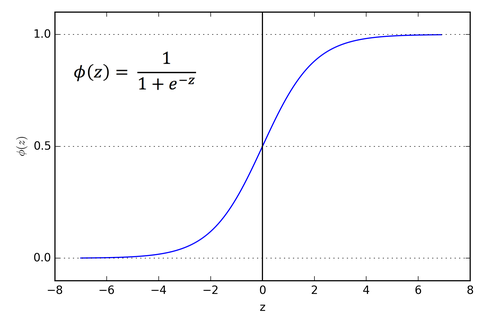

In [37]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

**to minimize the error, you propagate backwards by finding the derivative of error with respect to each weight and then subtracting this value from the weight value. The purpose of this calculations is optimize the algorithm. This operation can be done with gradient descent method.**

In [38]:
def forward_backward_propagtion(weight, bias, x_train, y_train):
    # forward propagation
    z = np.dot(weight.T,x_train) + bias # z = b + w1.x1 + w2.x2 + .... + w302.x302
    y_head = sigmoid(z)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1] #x_train.shape[1] for normalization
    
    # backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1] #simple derivative
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias} #for storage
     
    return cost,gradients

**Function for updating cost value and function**

In [39]:
def update(weight, bias, x_train, y_train, learning_rate, iteration) :
    cost_list = []
    index = []
    
    # updating(learning) parameters in number_of_iterarion times
    for i in range(iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagtion(weight,bias,x_train,y_train)
        # update
        weight = weight - learning_rate * gradients["Derivative Weight"]
        bias = bias - learning_rate * gradients["Derivative Bias"]
        
        cost_list.append(cost)
        index.append(i)
        print ("Cost after iteration %i: %f" %(i, cost))
        
    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,cost_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

**Predicting the values**

In [40]:
def predict(weight, bias, x_test):
    # x_test is an input for forward propagation
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

**Logistic regression by traing and testing values**

In [41]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iteration):
    # initialize
    dimension = x_train.shape[0]
    weight,bias = initialize_weights_and_bias(dimension)
     
    parameters, gradients = update(weight, bias,x_train, y_train, learning_rate, iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    d = (100 - np.mean(np.abs(y_prediction - y_test))*100)
    print("Accuracy of Model : {}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

    return d

Cost after iteration 0: 0.694143
Cost after iteration 1: 0.637710
Cost after iteration 2: 0.595466
Cost after iteration 3: 0.563357
Cost after iteration 4: 0.538497
Cost after iteration 5: 0.518852
Cost after iteration 6: 0.503031
Cost after iteration 7: 0.490052
Cost after iteration 8: 0.479228
Cost after iteration 9: 0.470065
Cost after iteration 10: 0.462202
Cost after iteration 11: 0.455376
Cost after iteration 12: 0.449387
Cost after iteration 13: 0.444084
Cost after iteration 14: 0.439351
Cost after iteration 15: 0.435096
Cost after iteration 16: 0.431245
Cost after iteration 17: 0.427740
Cost after iteration 18: 0.424535
Cost after iteration 19: 0.421589
Cost after iteration 20: 0.418871
Cost after iteration 21: 0.416354
Cost after iteration 22: 0.414015
Cost after iteration 23: 0.411834
Cost after iteration 24: 0.409797
Cost after iteration 25: 0.407887
Cost after iteration 26: 0.406094
Cost after iteration 27: 0.404407
Cost after iteration 28: 0.402815
Cost after iteration 29:

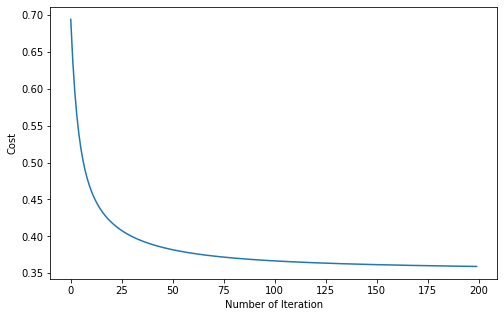

Accuracy of Model : 85.3658536585366%


In [42]:
lggd = logistic_regression(x_train,y_train,x_test,y_test,2,200)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.8536585365853658


In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
dataset['sex']= le.fit_transform(dataset['sex'])

**spliting data and train for other model**

In [45]:
from sklearn.model_selection import train_test_split

data_input = dataset.drop(['target'],axis=1)
data_target = dataset.target

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target,random_state=0)

In [46]:
ss= StandardScaler()
train_scaled=ss.fit_transform(train_input)
test_scaled=ss.fit_transform(test_input)

**KNN model**

**Simple linear Regrssion**

In [47]:
#Logistic
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
lg = lr.score(test_scaled, test_target) * 100
print(lg)

86.38132295719845


**Comparision of logistic regression model with other model**

[Text(0, 0.5, 'Accuracy percentage'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'Comparison of diffirent Model accuracy')]

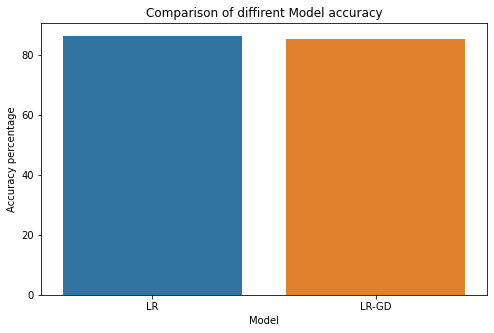

In [48]:
a = ["LR","LR-GD"]
b = [lg,lggd]
sb.barplot(a, b).set(title="Comparison of diffirent Model accuracy",xlabel='Model',ylabel="Accuracy percentage")

In [49]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit( self, X, Y ) :		
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape		
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :		
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		# calculate gradients		
		tmp = ( A - self.Y.T )		
		tmp = np.reshape( tmp, self.m )		
		dW = np.dot( self.X.T, tmp ) / self.m		
		db = np.sum( tmp ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y


# Driver code


def main() :
	
	# Importing dataset	
	df = dataset
	X = df.iloc[:,:-1].values
	Y = df.iloc[:,-1:].values
	
	# Splitting dataset into train and test set
	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )
	
	# Model training	
	model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
	
	model.fit( X_train, Y_train )	
	model1 = LogisticRegression()	
	model1.fit( X_train, Y_train)
	
	# Prediction on test set
	Y_pred = model.predict( X_test )	
	Y_pred1 = model1.predict( X_test )
	
	# measure performance	
	correctly_classified = 0	
	correctly_classified1 = 0
	
	# counter	
	count = 0	
	for count in range( np.size( Y_pred ) ) :
		
		if Y_test[count] == Y_pred[count] :			
			correctly_classified = correctly_classified + 1
		
		if Y_test[count] == Y_pred1[count] :			
			correctly_classified1 = correctly_classified1 + 1
			
		count = count + 1
		
	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )


if __name__ == "__main__" :	
	main()


Accuracy on test set by our model	 :  58.187134502923975
Accuracy on test set by sklearn model :  87.42690058479532
